# Simplifying geometries


Sometimes it might be useful to be able to simplify geometries. This could be
something to consider for example when you have very detailed spatial features
that cover the whole world. If you make a map that covers the whole world, it
is unnecessary to have really detailed geometries because it is simply
impossible to see those small details from your map. Furthermore, it takes a
long time to actually render a large quantity of features into a map. Here, we
will see how it is possible to simplify geometric features in Python.

As an example we will use data representing the Amazon river in South America,
and simplify it's geometries.

Let's first read the data and see how the river looks like:

In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [2]:
import geopandas as gpd

amazon = gpd.read_file(DATA_DIRECTORY / "amazon_river" / "amazon_river.gpkg")

amazon.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


In [3]:
amazon.crs

<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

<Axes: >

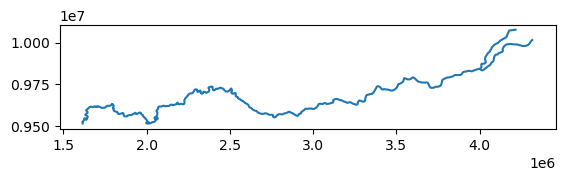

In [4]:
amazon.plot()

The LineString that is presented here is quite detailed, so let's see how we
can generalize them a bit. As we can see from the coordinate reference system,
the data is projected in a system using [Mercator projection based on
SIRGAS datum](http://spatialreference.org/ref/sr-org/7868/), and metres as a unit. 

Generalization can be done easily by using a Shapely function called
`.simplify()`. The `tolerance` parameter can be used to adjusts how much
geometries should be generalized. **The tolerance value is tied to the
coordinate system of the geometries**. Hence, the value we pass here is 20 000
**meters** (20 kilometers).

<Axes: >

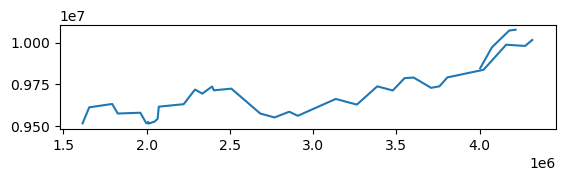

In [5]:
# Generalize geometry
amazon["simplegeom"] = amazon.simplify(tolerance=20_000)

# Set geometry to be our new simlified geometry
amazon = amazon.set_geometry("simplegeom")

# Plot 
amazon.plot()

Nice! As a result, now we have simplified our LineString quite significantly as we can see from the map.